# Analyzing Online Shopper Behavior: Data Overview, Research Question, and Exploratory Analysis
*By Audra Cornick (Group 24)* 

# Section 0: TA Feedback

- Score: 28/30
    - "visualization not very clear with too many variables explored at once"


# Section 1: Data Description

## Dataset Summary: Online Shoppers Purchasing Intention Dataset

### General Description

This dataset contains information from **12,330 user sessions** on an e-commerce website collected over a one-year period. Each session corresponds to a **unique user**, ensuring that no individual appears more than once. The dataset is designed to predict whether a user’s browsing session ends with a purchase (`Revenue = True`) or not (`Revenue = False`).

- **Total sessions:** 12,330  
- **Positive class (purchase):** 1,908 sessions (15.5%)  
- **Negative class (no purchase):** 10,422 sessions (84.5%)  
- **Number of variables:** 18 (17 features + 1 target variable)  
- **Variable types:** 10 numerical, 8 categorical  
- **Missing values:** None   

---

### Dataset Characteristics

| **Attribute** | **Role** | **Type** | **Description** | **Units / Values** | **Missing Values** |
|----------------|-----------|-----------|------------------|--------------------|--------------------|
| Administrative | Feature | Integer | Number of administrative pages visited | Count | No |
| Administrative_Duration | Feature | Continuous | Total time spent on administrative pages | Seconds | No |
| Informational | Feature | Integer | Number of informational pages visited | Count | No |
| Informational_Duration | Feature | Continuous | Total time spent on informational pages | Seconds | No |
| ProductRelated | Feature | Integer | Number of product-related pages visited | Count | No |
| ProductRelated_Duration | Feature | Continuous | Total time spent on product-related pages | Seconds | No |
| BounceRates | Feature | Continuous | Percentage of visitors who left after viewing one page | Rate (0–1) | No |
| ExitRates | Feature | Continuous | Percentage of visitors who exited the site from that page | Rate (0–1) | No |
| PageValues | Feature | Continuous | Average value of a page prior to transaction | Currency-based value | No |
| SpecialDay | Feature | Continuous | Closeness of the visit to a special day (e.g., Valentine’s Day) | 0–1 | No |
| Month | Feature | Categorical | Month of the year when session occurred | e.g., "Feb", "Mar", "Nov" | No |
| OperatingSystems | Feature | Categorical | Operating system used by visitor | Integer codes | No |
| Browser | Feature | Categorical | Browser type | Integer codes | No |
| Region | Feature | Categorical | Geographic region of visitor | Integer codes | No |
| TrafficType | Feature | Categorical | Traffic source (e.g., direct, referral, ad) | Integer codes | No |
| VisitorType | Feature | Categorical | Visitor type | Returning_Visitor / New_Visitor | No |
| Weekend | Feature | Categorical (Boolean) | Whether the session occurred on a weekend | True / False | No |
| **Revenue** | **Target Variable** | **Categorical (Boolean)** | Indicates if session resulted in a purchase | True / False | No |

---

### Source and Information

The **Online Shoppers Purchasing Intention Dataset** was obtained from the **UCI Machine Learning Repository** (donated on August 30, 2018).  
Each observation represents a unique online shopping session recorded over a one-year period from an e-commerce website. The data were collected using **Google Analytics metrics** such as bounce rates, exit rates, and page values, as well as additional session-level features including time spent on different page types, operating system, traffic source, and date-related variables.  

[**Link to download data**](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) 

**Citation:**  
Sakar, C. O., Polat, S., Katircioglu, M., & Kastro, Y. (2019). *Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks.* *Neural Computing & Applications.*

---

## Pre-selection of Variables

The dataset contains 18 variables (17 features + 1 target variable `Revenue`). For this project, we will retain only the target variable and visitor context/marketing factors to focus on human behavior and marketing influences while keeping the model manageable.

### **Retained Variables**
- **Revenue** – Target variable indicating whether the session resulted in a purchase (True/False).  
- **Region** – Geographic location of the visitor; may influence purchasing behavior. (Not including region 1)  
- **TrafficType** – Source of the session (e.g., direct, referral, ad); reflects marketing channel impact.  
- **VisitorType** – Differentiates new vs. returning visitors; captures prior engagement.    
- **Weekend** – Whether the session occurred on a weekend; accounts for day-of-week patterns.

### **Dropped Variables**
- **Behavioral / Engagement Metrics:** `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, `PageValues`  
  - These describe session activity but are excluded to focus the analysis on social and marketing factors.  

- **Technical Variables:** `OperatingSystems`, `Browser`  
  - These may contribute limited information regarding human behavior and marketing patterns and are therefore excluded.

<mark> <u> **Edit** </u> :
- <mark>**Dropped Due to Unnecessity:** `SpecialDay` & `Month`<mark>
    - <mark> I will be dropping **SpecialDay** as it showed minimal differences across Revenue. I will also be dropping **Month**, as the dataset is missing information for January, April, and June and it will not be useful in assessing people's daily habits. <mark>
<mark>

# Section 2: Scientific Question
**Question:** We want to explore how visitor context and marketing-related factors (e.g., traffic type, visitor type, weekend) are associated with whether a user completes a purchase.

- **Response variable:** Our target variable is revenue (purchase: True/False).

- **Focus:** The primary focus of this project is inference, as we aim to understand how visitor context and marketing factors (e.g., traffic type, visitor type, and weekend) influence the likelihood of completing a purchase. While prediction could also be performed, the main goal is to identify the impact of human and marketing-related variables on purchase behavior rather than to maximize predictive accuracy.

<mark> <u> **EDITS** </u>: Distance to special days didn't show much affect towards purchasing in the explorartory data analysis so we are going to drop that feature. Major factors based on EDA are visitor type, traffic type, and weekday. Month is missing January, April, and June so it doesn't give a complete outlook of the whole year.  <mark>

# Section 3: EDA

In [139]:
# Load necessary libraries
library(tidyverse)  
library(readr)      
library(patchwork)
library(gridExtra)
library(ggpubr)
library(broom)

# Load the dataset
data <- read_csv("online_shoppers_intention.csv")
head(data)

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [140]:
# Clean data
shop_data <- data %>%
  select(Revenue, Region, TrafficType, VisitorType, Weekend) %>%
  filter(Region != 1) %>%
  mutate(
    VisitorType = factor(VisitorType),
  )

In [141]:
options(repr.plot.width = 8, repr.plot.height = 14)
# 1. Heatmap: Conversion rates of TrafficType x VisitorType vs Revenue
heat_visitor_traffic <- shop_data %>%
  group_by(TrafficType, VisitorType) %>%
  summarise(ConversionRate = mean(Revenue) * 100, .groups = 'drop')

p1 <- ggplot(heat_visitor_traffic, aes(x = TrafficType, y = VisitorType, fill = ConversionRate)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Conversion Rates by TrafficType & VisitorType", fill = "% Purchases") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 2. Faceted Bar: Weekend × Revenue by Region
weekend_region <- shop_data %>%
  group_by(Region, Weekend) %>%
  summarise(ConversionRate = mean(Revenue) * 100, .groups = 'drop')

p2 <- ggplot(weekend_region, aes(x = Weekend, y = ConversionRate, fill = Weekend)) +
  geom_col() +
  facet_wrap(~Region) +
  labs(title = "Revenue by Weekend vs Region", x = "Day Type", y = "% Purchases") +
  theme_minimal() +
  theme(legend.position = "none") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3. Heatmap: Region × TrafficType vs Revenue
region_traffic <- shop_data %>%
  group_by(Region, TrafficType) %>%
  summarise(ConversionRate = mean(Revenue) * 100, .groups = 'drop')

p3 <- ggplot(region_traffic, aes(x = factor(Region), y = TrafficType, fill = ConversionRate)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "darkgreen") +
  labs(title = "Revenue by Region & TrafficType", x = "Region", y = "Traffic Type", fill = "% Purchases") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.text.y =element_text(angle = 45, hjust = 1))

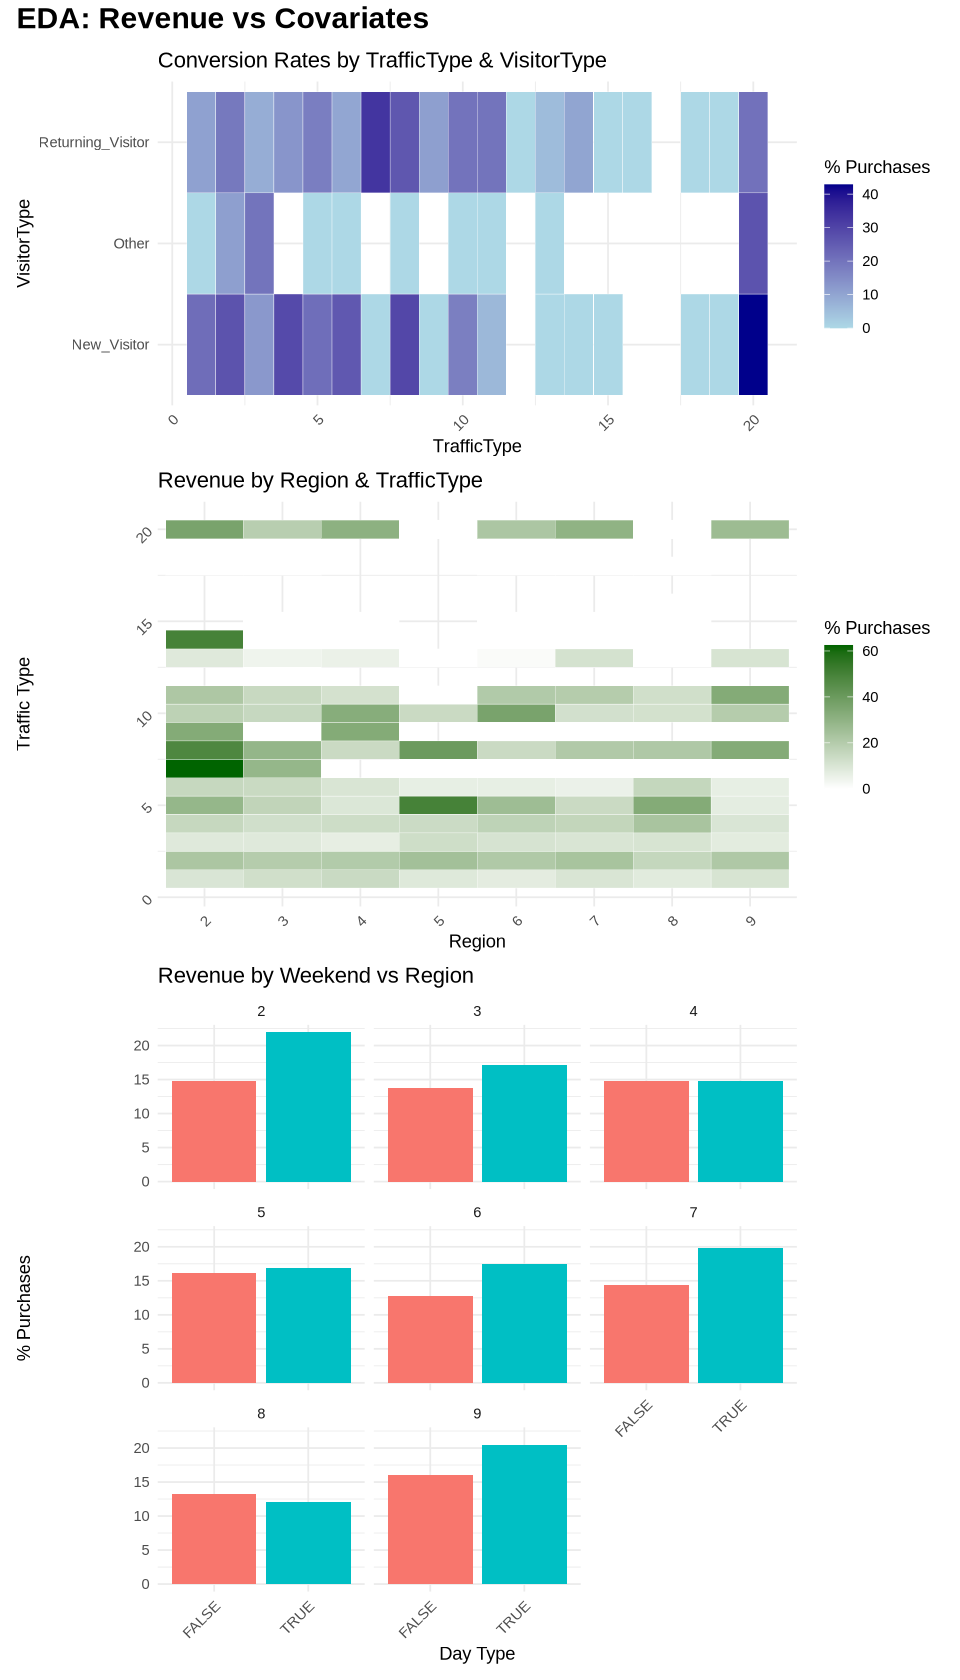

In [142]:
# Combine plots into one column, three rows
combined_plot <- wrap_plots(
  p1, p3, p2,
  ncol = 1,
  heights = c(2, 2.5, 3.5)  
) & theme(plot.margin = margin(5,5,5,5)) 

combined_plot + plot_annotation(
  title = "EDA: Revenue vs Covariates",
  theme = theme(plot.title = element_text(size = 18, face = "bold"))
)

### Interpretation of the EDA Figure 

<mark> <u> **EDITS** </u>: Redid the EDA to have clearer, less complex figures and removed the additional covariates that I no longer intend to use in building my model (`Month` and `SpecialDay`). Therefore, I have also redone the interpretations as the visualizations have changed. <mark>

**Relevance:**  
This figure explores patterns in visitor behavior and store traffic factors that may influence revenue, including visitor type, traffic source, weekend vs. weekday shopping, and regional differences. It helps identify trends, potential sparsity, and relationships in the data before formal modeling.  

**Results:**  
Purchases are more common among certain visitor types (e.g., new vs. returning), specific traffic sources, and in particular regions. Revenue also tends to be higher on weekends in most regions. Some combinations of traffic type × visitor type or region × traffic type show very few or no purchases, highlighting uneven distributions in the data. 

**Insights:**  
Visitor type, traffic source, and weekend shopping are likely important predictors of revenue. Sparse or skewed distributions in some groups may pose challenges for modeling. The figure also suggests potential interactions between covariates (e.g., visitor type × traffic type) and temporal effects (weekend vs. weekday) that could be explored further in analysis.


# Section 4: Method and Plan

I would use a logistic regression model to estimate the associations between visitor context/marketing factors (traffic type, visitor type, weekend) and the likelihood of completing a purchase (Revenue = TRUE).

- **Why appropriate**: Logistic regression is appropriate because the response variable is binary, and the model provides interpretable coefficients that quantify how each covariate influences the odds of a purchase. This aligns with the project’s goal of understanding the impact of specific factors rather than making predictions.

- **Assumptions required**: The method assumes independence of observations, a linear relationship between predictors and the log-odds of the outcome, and no perfect multicollinearity among predictors.

- **Potential limitations**: Logistic regression may not capture nonlinear relationships or complex interactions unless explicitly modeled. Sparse categories (e.g., rare traffic type × visitor type combinations) could result in unstable estimates. Additionally, causal interpretation is limited, as logistic regression identifies associations rather than proving causation.

# Section 5: Computational Code and Output


## 5.1: Model Code

In [143]:
shop_df<- data %>%
  select(Revenue, Region, TrafficType, VisitorType, Weekend) %>%
  filter(Region != 1) %>%
  mutate(
    VisitorType = factor(VisitorType),
    TrafficType = factor(TrafficType),  
    Weekend = factor(Weekend)
  )

In [144]:
# 1. Fit additive model
model_additive <- glm(
  Revenue ~ VisitorType + TrafficType + Weekend,
  data = shop_df,
  family = binomial
)

# 2. Fit interaction model
model_interaction <- glm(
  Revenue ~ VisitorType * TrafficType + Weekend,
  data = shop_df,
  family = binomial
)

In [145]:
# 3. Likelihood ratio test (ANOVA)
anova_table <- anova(model_additive, model_interaction, test = "Chisq")
anova_table


# 4. Create final results table (odds ratios and 95% CI)
## Suppressed the warning since the results for the Odds Ratio of the TrafficType 
## dummy variables are almost exactly 0 or 1, due to multiple routes never leading to purchases/
## always leading to purchases, causing a large list of warnings to appear. 
suppressWarnings({
  tidy_add <- tidy(model_additive, conf.int = TRUE, exponentiate = TRUE) %>%
    select(term, estimate, conf.low, conf.high, p.value) %>%
    rename(
      OddsRatio = estimate,
      CI_Lower = conf.low,
      CI_Upper = conf.high,
      P_Value = p.value
    )
})

tidy_add

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7528,6142.663,NA,NA,NA
2,7503,6119.273,25,23.39025,0.5547865


term,OddsRatio,CI_Lower,CI_Upper,P_Value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.832108e-01,0.14470754,2.309482e-01,5.589844e-46
VisitorTypeOther,6.462522e-01,0.32455315,1.230505e+00,1.972212e-01
VisitorTypeReturning_Visitor,6.428517e-01,0.54174136,7.644577e-01,4.882171e-07
TrafficType2,1.894199e+00,1.56542471,2.300319e+00,7.550801e-11
TrafficType3,7.536197e-01,0.58096550,9.730229e-01,3.137075e-02
TrafficType4,1.311175e+00,1.00214141,1.707487e+00,4.604896e-02
TrafficType5,1.508944e+00,0.93358573,2.367874e+00,8.212255e-02
TrafficType6,9.701859e-01,0.64344741,1.423071e+00,8.808194e-01
TrafficType7,3.648054e+00,1.37485295,8.790221e+00,5.433471e-03


## 5.2: Results and Interpretation

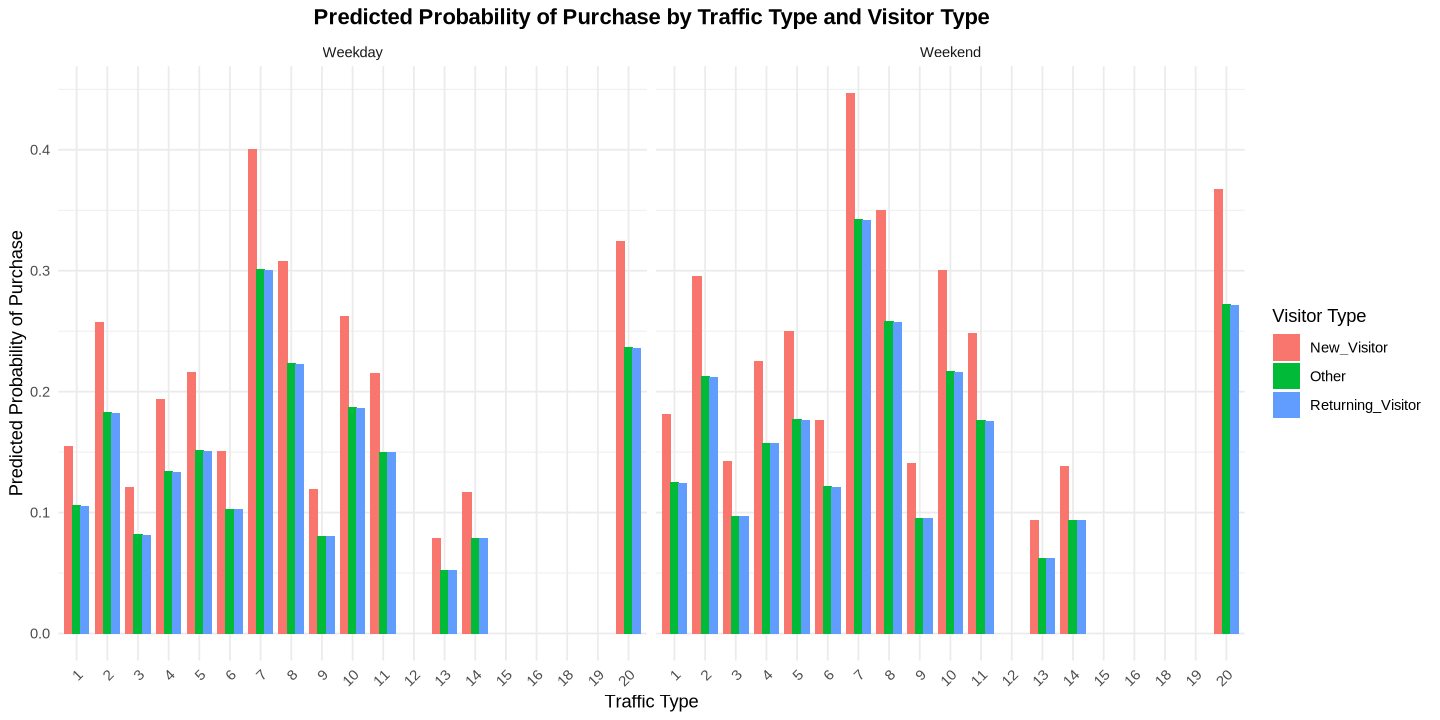

In [146]:
# 5. predicted probabilities for visualization
newdata_add <- expand.grid(
  VisitorType = levels(shop_df$VisitorType),
  TrafficType = levels(shop_df$TrafficType),
  Weekend = levels(shop_df$Weekend)
)

newdata_add$pred <- predict(model_additive, newdata_add, type = "response")

# Plot Predicted Probabilities
options(repr.plot.width = 12, repr.plot.height = 6)

ggplot(newdata_add, aes(x = TrafficType, y = pred, fill = VisitorType)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  facet_wrap(~ Weekend, labeller = labeller(Weekend = c("FALSE" = "Weekday", "TRUE" = "Weekend"))) +
  labs(
    title = "Predicted Probability of Purchase by Traffic Type and Visitor Type",
    x = "Traffic Type",
    y = "Predicted Probability of Purchase",
    fill = "Visitor Type"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

* The additive logistic regression model indicates that both visitor type and traffic channel significantly affect purchase probability, while Weekend has a small positive effect. Returning visitors have lower odds of purchase than New_Visitors (OR = 0.64, 95% CI: 0.54–0.76), and “Other” visitors do not differ significantly, while several traffic channels (TrafficType7, 8, 10, and 20) strongly increase purchase likelihood. Including the interaction between VisitorType and TrafficType did not improve model fit (ANOVA χ² = 23.39, df = 25, p = 0.555), confirming the additive model adequately captures the main relationships. These results show that some marketing factors, such as specific traffic channels, are more effective at driving purchases, that prior exposure to the product (returning visitors) matters, and that purchases are slightly more likely on weekends than weekdays, directly addressing the research question.